# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [32]:
!pip install seaborn
!pip install matplotlib
!pip install -U kaleido
!pip install plotly

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px

In [34]:
df = pd.read_csv('WHO_COVID19_cases.csv')
df.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [35]:
countries = ['China', 'India', 'Germany']
filtered_df = df[df['Country'].isin(countries)]
print(filtered_df)

      Date_reported Country_code Country Continent WHO_region  New_cases  \
10248    2020-01-05           CN   China      Asia       WPRO        1.0   
10249    2020-01-12           CN   China      Asia       WPRO       44.0   
10250    2020-01-19           CN   China      Asia       WPRO       80.0   
10251    2020-01-26           CN   China      Asia       WPRO     1860.0   
10252    2020-02-02           CN   China      Asia       WPRO    12426.0   
...             ...          ...     ...       ...        ...        ...   
23663    2024-08-04           IN   India      Asia      SEARO      313.0   
23664    2024-08-11           IN   India      Asia      SEARO      306.0   
23665    2024-08-18           IN   India      Asia      SEARO      266.0   
23666    2024-08-25           IN   India      Asia      SEARO      200.0   
23667    2024-09-01           IN   India      Asia      SEARO      282.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
10248                 1       

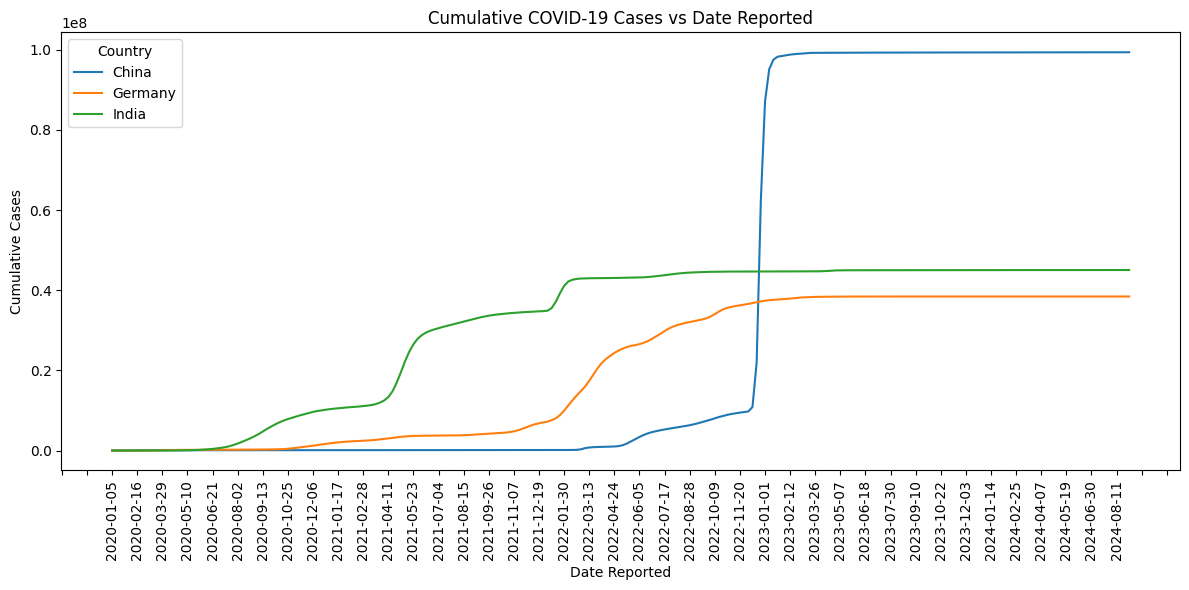

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='Date_reported', y='Cumulative_cases', hue='Country')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6))
plt.title('Cumulative COVID-19 Cases vs Date Reported')
plt.xlabel('Date Reported')
plt.ylabel('Cumulative Cases')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

In [37]:
# Filter the data for three countries
countries = ['China', 'India', 'Germany']  # Replace with actual country names
filtered_df = df[df['Country'].isin(countries)]

# Check the filtered DataFrame
print(filtered_df.head())
print(filtered_df.shape)

      Date_reported Country_code Country Continent WHO_region  New_cases  \
10248    2020-01-05           CN   China      Asia       WPRO        1.0   
10249    2020-01-12           CN   China      Asia       WPRO       44.0   
10250    2020-01-19           CN   China      Asia       WPRO       80.0   
10251    2020-01-26           CN   China      Asia       WPRO     1860.0   
10252    2020-02-02           CN   China      Asia       WPRO    12426.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
10248                 1         NaN                  0  
10249                45         1.0                  1  
10250               125         2.0                  3  
10251              1985        53.0                 56  
10252             14411       305.0                361  
(732, 9)


In [38]:
# Convert to numeric if necessary
filtered_df['Cumulative_cases'] = pd.to_numeric(filtered_df['Cumulative_cases'], errors='coerce')
filtered_df['Cumulative_deaths'] = pd.to_numeric(filtered_df['Cumulative_deaths'], errors='coerce')

/var/folders/kx/35380zqx7fvczy74kh7ych5h0000gn/T/ipykernel_6000/259636719.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kx/35380zqx7fvczy74kh7ych5h0000gn/T/ipykernel_6000/259636719.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
# Create a Plotly line plot
fig = px.line(
    filtered_df,
    x='Cumulative_cases',
    y='Cumulative_deaths',
    color='Country',
    title='Cumulative Deaths vs Cumulative Cases',
    labels={'Cumulative_cases': 'Cumulative Cases', 'Cumulative_deaths': 'Cumulative Deaths'}
)

# Show the plot
fig.show()
